# Base de dados e importações

In [ ]:
!gdown --id 1ywzJAOv9SoRluet6r4Pz6R1vIFDDxo-q --output dados.zip
!unzip dados.zip
!gdown --id 1wG0iOHehIWF38kEpGhuHfFRotBBMC9t_ --output CSV.zip
!unzip CSV.zip

Downloading...
From: https://drive.google.com/uc?id=1ywzJAOv9SoRluet6r4Pz6R1vIFDDxo-q
To: /content/dados.zip
23.2MB [00:00, 142MB/s]
Archive:  dados.zip
   creating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/
  inflating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/e0107451-503c-48b0-9a9e-675a3a0c834e.jpg  
  inflating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/9b8791f6-9c76-41a6-b8bf-3090c8b4609f.jpg  
  inflating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/6d25354c-712b-4d24-831a-e99a95dd597b.jpg  
  inflating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/b2f44fa1-bf02-421f-afaf-9c19de73caf9.jpg  
  inflating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/6e3510f8-1fb9-4bd7-b316-adddd9b5fd67.jpg  
  inflating: content/audios_MFCC_segmentados_concatenados_especialistas_completo/7667763a-3a74-4a29-b5f3-67b626922e05.jpg  
  inflating: content/

In [ ]:
import pandas as pd
from collections import Counter
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Foi efetuado o mapeamento das classes que até então era string categórico, para os valores 0, 1 e 2.

*   healthy - 0 
*   symptomatic -  1 
*   COVID-19 - 2

In [ ]:
train = pd.read_csv('/content/CSV/train.csv')
val = pd.read_csv('/content/CSV/val.csv')
train['classInt'] = train['status'].replace(['healthy','symptomatic','COVID-19'], [0, 1, 2])
val['classInt'] = val['status'].replace(['healthy','symptomatic','COVID-19'], [0, 1, 2])
train['classStr'] = train['classInt'].astype('str')
val['classStr'] = val['classInt'].astype('str')
train['uuid'] = train['uuid'] + '.jpg'
val['uuid'] = val['uuid'] + '.jpg'

In [ ]:
def cria_e_treina_rede(model_name, train_df, val_df, batch_size=32, callbacks=[], image_size=(256, 256), pooling='avg', loss='categorical_crossentropy', epochs=500, class_weights=class_weights, trainable=True):

  if model_name == 'resnet50' or model_name == 'resnet101' or model_name == 'resnet152':
    preprocessing_function = tf.keras.applications.resnet.preprocess_input
  elif model_name == 'efficientnetb0' or model_name == 'efficientnetb1' or model_name == 'efficientnetb2' or model_name == 'efficientnetb3' or model_name == 'efficientnetb4' or model_name == 'efficientnetb5'  or model_name == 'efficientnetb6' or model_name == 'efficientnetb7':
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input
  elif model_name == 'mobilenet':
    preprocessing_function = tf.keras.applications.mobilenet.preprocess_input
  elif model_name == 'mobilenetv2':
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
  elif model_name == 'densenet121' or model_name == 'densenet169' or model_name == 'densenet201':
    preprocessing_function = tf.keras.applications.densenet.preprocess_input
  elif model_name == 'inceptionv3':
    preprocessing_function = tf.keras.applications.inception_v3.preprocess_input
  elif model_name == 'inceptionresnetv2':
    preprocessing_function = tf.keras.applications.inception_resnet_v2.preprocess_input
  elif model_name == 'xception':
    preprocessing_function = tf.keras.applications.xception.preprocess_input
  elif model_name == 'vgg16':
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
  elif model_name == 'vgg19':
    preprocessing_function = tf.keras.applications.vgg19.preprocess_input

  datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocessing_function,
  )

  train_generator = datagen.flow_from_dataframe(
    train_df, directory='/content/content/audios_MFCC_segmentados_concatenados_especialistas_completo', x_col='uuid', y_col='classStr',
    target_size=image_size, class_mode='categorical', batch_size=batch_size, shuffle=True, seed=42, color_mode='rgb')

  val_generator = datagen.flow_from_dataframe(
    val_df, directory='/content/content/audios_MFCC_segmentados_concatenados_especialistas_completo', x_col='uuid', y_col='classStr',
    target_size=image_size, class_mode='categorical', batch_size=batch_size, shuffle=False, seed=42, color_mode='rgb')
  
  if model_name == 'resnet50':
    pre_trained = tf.keras.applications.ResNet50(include_top=False, pooling=pooling)
  elif model_name == 'resnet101':
    pre_trained = tf.keras.applications.ResNet101(include_top=False, pooling=pooling)
  elif model_name == 'resnet152':
    pre_trained = tf.keras.applications.ResNet152(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb0':
    pre_trained = tf.keras.applications.EfficientNetB0(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb1':
    pre_trained = tf.keras.applications.EfficientNetB1(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb2':
    pre_trained = tf.keras.applications.EfficientNetB2(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb3':
    pre_trained = tf.keras.applications.EfficientNetB3(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb4':
    pre_trained = tf.keras.applications.EfficientNetB4(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb5':
    pre_trained = tf.keras.applications.EfficientNetB5(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb6':
    pre_trained = tf.keras.applications.EfficientNetB6(include_top=False, pooling=pooling)
  elif model_name == 'efficientnetb7':
    pre_trained = tf.keras.applications.EfficientNetB7(include_top=False, pooling=pooling)
  elif model_name == 'mobilenet':
    pre_trained = tf.keras.applications.MobileNet(include_top=False, pooling=pooling)
  elif model_name == 'mobilenetv2':
    pre_trained = tf.keras.applications.MobileNetV2(include_top=False, pooling=pooling)
  elif model_name == 'densenet121':
    pre_trained = tf.keras.applications.DenseNet121(include_top=False, pooling=pooling)
  elif model_name == 'densenet169':
    pre_trained = tf.keras.applications.DenseNet169(include_top=False, pooling=pooling)
  elif model_name == 'densenet201':
    pre_trained = tf.keras.applications.DenseNet201(include_top=False, pooling=pooling)
  elif model_name == 'inceptionv3':
    pre_trained = tf.keras.applications.InceptionV3(include_top=False, pooling=pooling)
  elif model_name == 'inceptionresnetv2':
    pre_trained = tf.keras.applications.InceptionResNetV2(include_top=False, pooling=pooling)
  elif model_name == 'xception':
    pre_trained = tf.keras.applications.Xception(include_top=False, pooling=pooling)
  elif model_name == 'vgg16':
    pre_trained = tf.keras.applications.VGG16(include_top=False, pooling=pooling)
  elif model_name == 'vgg19':
    pre_trained = tf.keras.applications.VGG19(include_top=False, pooling=pooling)

  for layer in pre_trained.layers:
    layer.treinable = trainable

  model = tf.keras.models.Sequential([
   pre_trained,
   tf.keras.layers.Dense(3, activation='softmax')
  ])

  model.summary()

  optimizer = tf.keras.optimizers.Adam(0.000001)

  model.compile(loss=loss, optimizer=optimizer, metrics=['acc'])

  list_of_callbacks = []
  if 'earlystopping' in callbacks:
    list_of_callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode="min", restore_best_weights=True, verbose=1))
  if 'reducelr' in callbacks:
    list_of_callbacks.append(tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, mode="min", verbose=1))
  if 'checkpoint' in callbacks:
    list_of_callbacks.append(tf.keras.callbacks.ModelCheckpoint('/content/' + model_name + '.hdf5', save_best_only=True, verbose=1))

  history = model.fit(train_generator, validation_data=val_generator, batch_size=batch_size, class_weight=class_weights, callbacks=list_of_callbacks, epochs=epochs)

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title(model_name + ' accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(model_name + ' loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  predict_val = model.predict(val_generator, verbose=1)
  y_true = []

  i = 0
  for batch, label in val_generator:
    i += batch.shape[0]
    for l in np.argmax(label, axis=1):
      y_true.append(l)
    if i == len(val_df): break

  y_true = np.array(y_true)

  print(confusion_matrix(y_true, np.argmax(predict_val, axis=1)))

  cm = confusion_matrix(y_true, np.argmax(predict_val, axis=1))
  cm = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
  balanced_acc = np.trace(cm) / 3
  print('Acuracia balanceada na validacao:', balanced_acc)

  return model

Found 1111 validated image filenames belonging to 3 classes.
Found 278 validated image filenames belonging to 3 classes.
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 2560)              64097687  
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 7683      
Total params: 64,105,370
Trainable params: 63,794,643
Non-trainable params: 310,727
_________________________________________________________________
Epoch 1/500
139/139 [==============================] - 106s 509ms/step - loss: 1.4237 - acc: 0.3447 - val_loss: 1.1174 - val_acc: 0.3273
Epoch 2/500
139/139 [==============================] - 65s 467ms/step - loss: 1.4120 - acc: 0.3672 - val_loss: 1.1121 - val_acc: 0.3165
Epoch 3/500
139/139 [==============================] - 65s 467ms/step - loss: 1.4083 - acc: 0.3618 - va

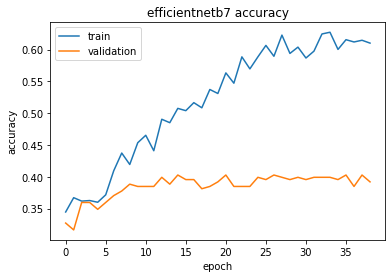

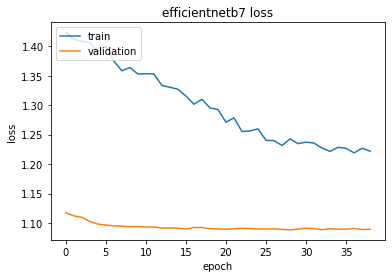

35/35 [==============================] - 8s 78ms/step
[[33 31 24]
 [30 49 28]
 [25 30 28]]
Acuracia balanceada na validacao: 0.39009777427466874


In [ ]:
model = cria_e_treina_rede('efficientnetb7', train, val, callbacks=['earlystopping', 'reducelr'], batch_size=8)

# Modelos

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 2560)              64097687  
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 7683      
Total params: 64,105,370
Trainable params: 63,794,643
Non-trainable params: 310,727
_________________________________________________________________


In [ ]:
test = pd.read_csv('/content/CSV/test.csv')
val = pd.read_csv('/content/CSV/val.csv')
test['classInt'] = test['status'].replace(['healthy','symptomatic','COVID-19'], [0, 1, 2])
val['classInt'] = val['status'].replace(['healthy','symptomatic','COVID-19'], [0, 1, 2])
test['classStr'] = test['classInt'].astype('str')
val['classStr'] = val['classInt'].astype('str')
test['uuid'] = test['uuid'] + '.jpg'
val['uuid'] = val['uuid'] + '.jpg'

In [ ]:
preprocessing_function = tf.keras.applications.efficientnet.preprocess_input

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocessing_function,
)

val_generator = datagen.flow_from_dataframe(
    val, directory='/content/content/audios_MFCC_segmentados_concatenados_especialistas_completo', x_col='uuid', y_col='classStr',
    target_size=(256, 256), class_mode='categorical', batch_size=8, shuffle=False, seed=42, color_mode='rgb')

test_generator = datagen.flow_from_dataframe(
    test, directory='/content/content/audios_MFCC_segmentados_concatenados_especialistas_completo', x_col='uuid', y_col='classStr',
    target_size=(256, 256), class_mode='categorical', batch_size=8, shuffle=False, seed=42, color_mode='rgb')

Found 278 validated image filenames belonging to 3 classes.
Found 347 validated image filenames belonging to 3 classes.


In [ ]:
predict_test = model.predict(test_generator, verbose=1)
y_true = []

i = 0
for batch, label in test_generator:
  i += batch.shape[0]
  for l in np.argmax(label, axis=1):
    y_true.append(l)
  if i == len(test): break

y_true = np.array(y_true)

print(confusion_matrix(y_true, np.argmax(predict_test, axis=1)))

cm = confusion_matrix(y_true, np.argmax(predict_test, axis=1))
cm = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cm) / 3
print('Acuracia balanceada no teste:', balanced_acc)

44/44 [==============================] - 3s 78ms/step
[[35 39 24]
 [36 70 28]
 [31 48 36]]
Acuracia balanceada no teste: 0.39752479836840643


In [ ]:
model.save('/content/drive/MyDrive/MFCC/efficientnetb7.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


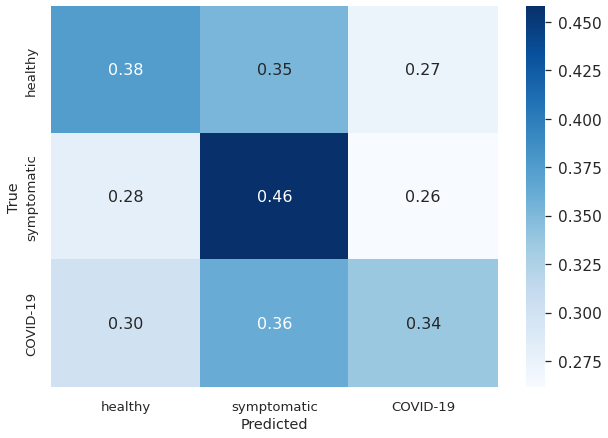

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

plt.rcParams.update({'font.size': 16})
sns.set(font_scale=1.2)

index = [ 'healthy', 'symptomatic', 'COVID-19']

cm = cm / cm.sum(axis=1)

df_cm = pd.DataFrame(cm, columns=index, index=index)

df_cm.index.name = 'True'
df_cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_yticklabels(index, va='center', rotation = 90, position=(0,1))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='.2f')# font size

plt.savefig('matriz-confusão.png', dpi=400)